In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline                
import seaborn as sns
import matplotlib

In [2]:
#OR 
import matplotlib.pyplot as plt

## Data Load: Load banglore home prices into a dataframe

In [3]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.tail(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
df1.shape

(13320, 9)

In [6]:
type(df1)

pandas.core.frame.DataFrame

In [7]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Pairplot

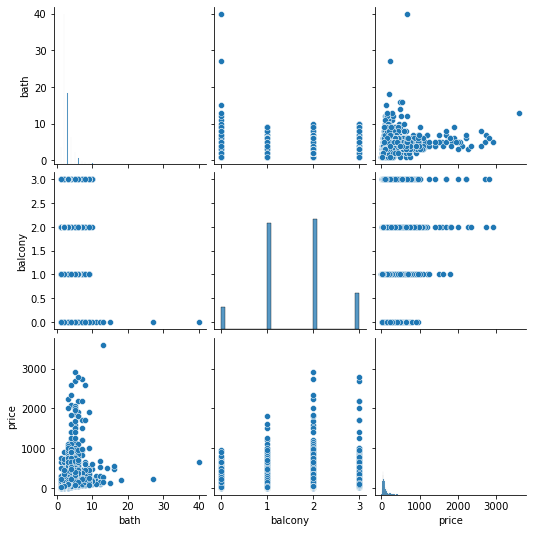

In [9]:
sns.pairplot(df1)

<b> This shows that bath and price have slightly linear correlation with some outliers

<b>Value count of each feature

In [10]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

In [11]:
value_count(df1)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Dec               1
16-Nov               1
16-Jan               1
14-Nov               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------------------
Whitefield                            540
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Banashankari 6th stage , 2nd block      1
4 Bedroom Farm House in Bagalur         1
NR Colony                               1
Jagajyothi layout                       1
Hommadevanahalli                        1
Name: location, Length: 1305

### Heatmap

<AxesSubplot:>

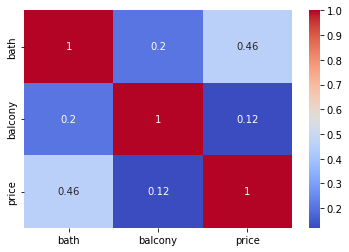

In [12]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df1[num_vars].corr(),cmap="coolwarm", annot=True)

<b> This shows that correlation of bath is greater than a balcony with price

In [13]:
df1.availability[0] # OR df1['availability'][0]

'19-Dec'

In [14]:
type(df1['availability'][0])

str

In [15]:
g=df1.groupby('area_type')

In [16]:
g.describe()

bath                                                \
                       count      mean       std  min  25%  50%  75%   max   
area_type                                                                    
Built-up  Area        2410.0  2.649378  1.250774  1.0  2.0  2.0  3.0  10.0   
Carpet  Area            87.0  2.505747  1.170108  1.0  2.0  2.0  3.0   9.0   
Plot  Area            2009.0  3.893479  2.022681  1.0  3.0  4.0  5.0  40.0   
Super built-up  Area  8741.0  2.430386  0.970320  1.0  2.0  2.0  3.0  27.0   

                     balcony            ...             price              \
                       count      mean  ...  75%  max   count        mean   
area_type                               ...                                 
Built-up  Area        2310.0  1.472727  ...  2.0  3.0  2418.0  104.285498   
Carpet  Area            82.0  1.402439  ...  2.0  3.0    87.0   89.502356   
Plot  Area            1837.0  1.392488  ...  2.0  3.0  2025.0  208.495486   
Super built-up  Area  8482.0  1.658100  ...  2.0  3.0  8790.0   92.971757   

                                                                          
                             std    min      25%    50%      75%     max  
area_type                                                                 
Built-up  Area        109.270222   9.00  47.0000   70.0  120.000  2050.0  
Carpet  Area           73.446012  13.00  47.7025   70.0  100.000   500.0  
Plot  Area            253.311895   8.44  85.0000  140.0  240.000  3600.0  
Super built-up  Area  113.971214   8.00  47.2500   65.0   98.195  2912.0  

[4 rows x 24 columns]

In [17]:
g.count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


## Drop features that are not required to build our model

In [18]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [19]:
df1.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<b> This shows that society has maximum missing values

In [20]:
df2=df1.drop(['area_type','availability','balcony','society'],axis='columns')
df2.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning: Handle NA values

In [21]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [22]:
df2.isnull().mean()*100

location      0.007508
size          0.120120
total_sqft    0.000000
bath          0.548048
price         0.000000
dtype: float64

<b>Visualize missing value using heatmap to get idea where is the value missing

<AxesSubplot:>

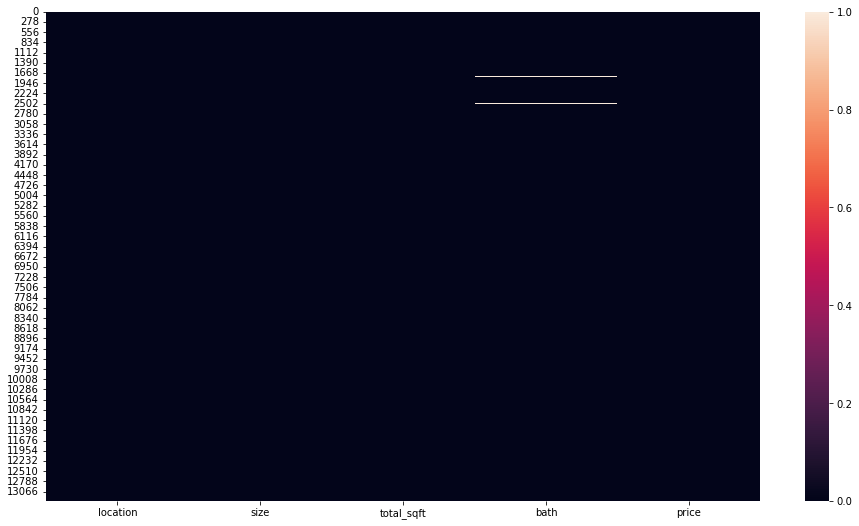

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.isnull())

<b> Remove all NaN values since these are very small

In [24]:
df3=df2.dropna()

In [25]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [26]:
(df2.shape,df3.shape)

((13320, 5), (13246, 5))

In [27]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Feature Engineering

---

<b><i> Example of splitting tokenwise based on specific word using lambda function in dataframe

In [28]:
y= {'house':['2 Bedroom','3 Bedroom','4 Bedroom']}
ab=pd.DataFrame(y)

In [29]:
ab

,house
0,2 Bedroom
1,3 Bedroom
2,4 Bedroom


In [30]:
type(ab['house'][0])

str

In [31]:
ab['BRK'] = ab['house'].apply(lambda x : (x.split('e')[0]))

In [32]:
ab

,house,BRK
0,2 Bedroom,2 B
1,3 Bedroom,3 B
2,4 Bedroom,4 B


---

In [33]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

<b> It shows that 4 Bedrooms and 4 BHK are same. To tackle this kind of problem, create new column in dataframe.

### 1- Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [34]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))  

C:\Users\Admin\AppData\Local\Temp\ipykernel_9572\4040932699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


<b>This shows that new column is created by name 'bhk'; this column is created based on 'size' column, apply fuction 'lambda' which will take the string and will tokenize it using the given space and will take first token which will be the valueof bhk, x will contain column value for each of the row one by one and on those values transformation will be applied by splitting string by space.This will give two tokens, out of which take first token by putting value 0. Also convert string into integer 

In [35]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [36]:
df3['bhk'].unique()  # OR df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [37]:
df3[df3['bhk']>20]  #to see rows of bedrooms greater than 20

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### 2- Explore total_sqft feature

In [38]:
df3.total_sqft.unique()   # OR df3['total_sqft'].value_counts()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

<b>Here we observe that 'total_sqft' contains string value in diff format (float-1689.28, int-817, range value 540 - 740, number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds)

<b><font color=red> OR </font><br>
<b> Create function to check for float value. Convert value in total_sqft column into float, if that is not float such as range then it will come in except block.

In [39]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [40]:
is_float('12.1')

True

In [41]:
is_float('22 - 4')

False

<b>Now apply this function on total_sqft column

In [42]:
df3[df3['total_sqft'].apply(is_float)]  #this shows all float values. Because in this way, is_float function will return True

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


<b>This shows all float values. Because in this way, is_float function will return True

In [43]:
df3[df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [44]:
#to print not float values such as ranges
df3[~df3['total_sqft'].apply(is_float)] #this will come by negative sign

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


<b><i>Now tackling ranges: When there is range, it will be converted into avaerage value. And the values with unit will be ignored.

In [45]:
def convert_range_to_num(x): #taking string
    tokens = x.split('-')  #splitting string by "-"
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2  #if there are 2 tokens, then take their avaerage
    try:
        return float(x)
    except:
        return None

In [46]:
convert_range_to_num('1105')

1105.0

<b>Now apply the function convert_range_to_num in your dataframe

In [47]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_range_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [48]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

<b>For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [49]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [50]:
df4.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [51]:
df5=df4.copy()

### 3- Add new feature called price per square feet

In [52]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [53]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### 4- Dimensionality Reduction

#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [54]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [55]:
len(df5.location.unique())

1304

<font color= blue>It means we will have to develop 1304 dummy columns using One Hot Encoding. So we will have to reduce high dimensionality problem.</font>

<b>First of all, remove extra spaces(at start and end of the location) in 'location' column

In [56]:
df5['location']=df5['location'].apply(lambda x: x.strip())

In [57]:
location_stats=df5.groupby('location')   # OR location_stats=df5.groupby('location')['location'].agg('count'), groupby by location and whatever I get result then on that give me location column on which I will perform aggregation function which will give me the count for location
location_stats.count()

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
1 Annasandrapalya,1,1,1,1,1,1
1 Giri Nagar,1,1,1,1,1,1
1 Immadihalli,1,1,1,1,1,1
1 Ramamurthy Nagar,1,1,1,1,1,1
12th cross srinivas nagar banshankari 3rd stage,1,1,1,1,1,1
...,...,...,...,...,...,...
t.c palya,1,1,1,1,1,1
tc.palya,4,4,4,4,4,4
vinayakanagar,1,1,1,1,1,1


In [58]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=True)# sort the locations by number of data points
location_stats

location
1 Annasandrapalya      1
Kudlu Village,         1
Kumbhena Agrahara      1
Kuvempu Layout         1
LIC Colony             1
                    ... 
Thanisandra          236
Kanakpura Road       266
Electronic City      304
Sarjapur  Road       392
Whitefield           535
Name: location, Length: 1293, dtype: int64

<b>Now declare threshlod  i.e, any location which has less than 10 data points is called 'other location'

In [59]:
len(location_stats[location_stats<=10])  #to check how many locations have less than 10 data point

1052

##### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [60]:
location_stats_less_than_10=location_stats[location_stats<=10] # to see which locations have less than 10 data points
location_stats_less_than_10

location
1 Annasandrapalya       1
Kudlu Village,          1
Kumbhena Agrahara       1
Kuvempu Layout          1
LIC Colony              1
                       ..
Kalkere                10
Naganathapura          10
Sector 1 HSR Layout    10
Basapura               10
BTM 1st Stage          10
Name: location, Length: 1052, dtype: int64

In [61]:
len(df5.location.unique())

1293

<b>Putting less than 10 location data points in 'other' column

In [62]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x) #location will be included in 'other' if x in location_stats_less_than_10

In [63]:
len(df5.location.unique())

242

In [64]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal

### Function to create histogram, Q-Q plot and boxplot

In [65]:
import scipy.stats as stats         # for Q-Q plots
 
def diagnostic_plots(df, variable): # function takes a dataframe (df) and the variable of interest as arguments
 
    plt.figure(figsize=(16, 4))     # define figure size
    
    plt.subplot(1, 3, 1)  
    sns.distplot(df[variable], bins=30)        # histogram
    plt.title('Histogram')
 
    
    plt.subplot(1, 3, 2) 
    stats.probplot(df[variable], dist="norm", plot=plt)    # Q-Q plot
    plt.ylabel('Variable quantiles')
 
    
    plt.subplot(1, 3, 3)       
    sns.boxplot(y=df[variable])    # boxplot
    plt.title('Boxplot')
 
    plt.show()

******* bath *******


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


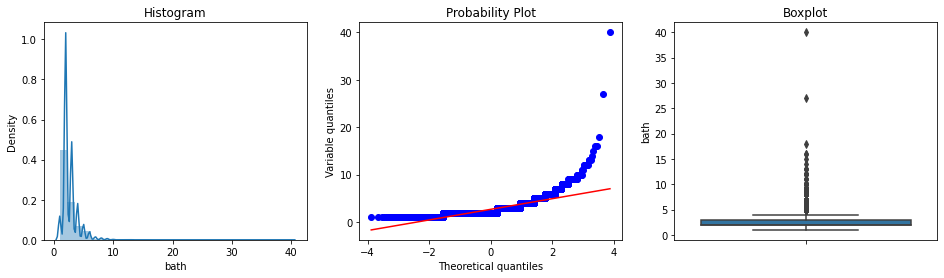

******* total_sqft *******


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


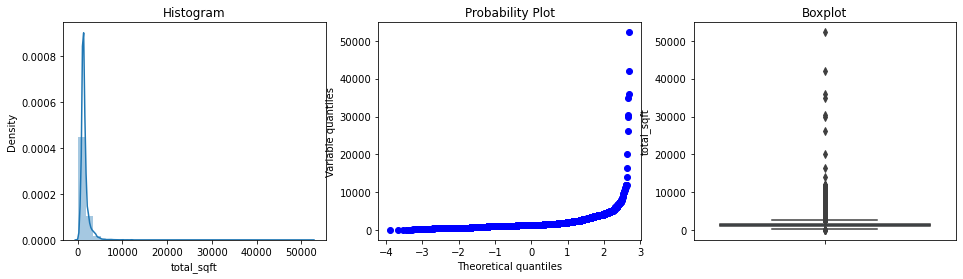

******* bhk *******


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


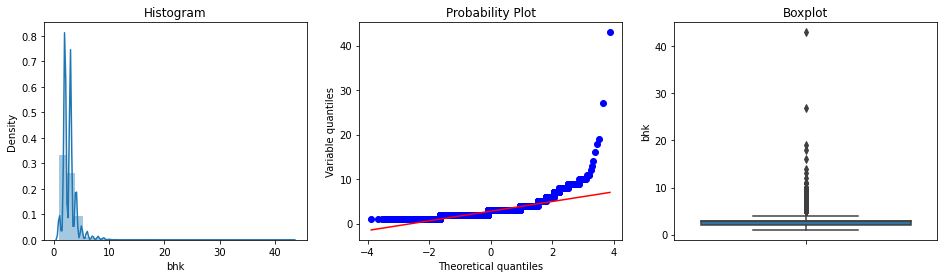

******* price *******


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


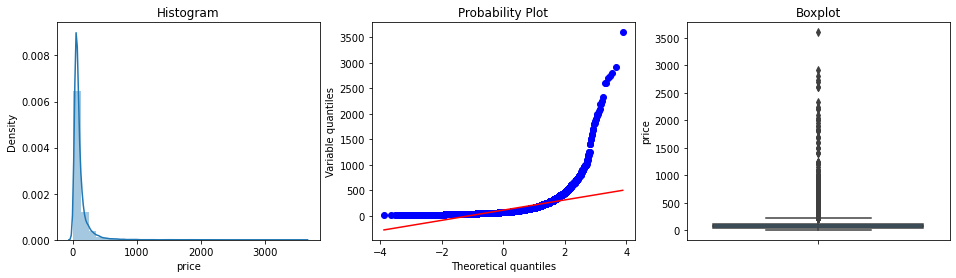

In [66]:
num_var = ["bath","total_sqft","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df5, var)

<b> Here we observe outlier using histogram,, qq plot and boxplot

#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [67]:
df5[df5.total_sqft/df5.bhk<300].head() #data where this threshold is not met, to print those rows where this division results in less than 300. So we will have to remove these

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


#### Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [68]:
df5.shape

(13246, 7)

In [69]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

### Outlier Removal in price_per_sqft Using Standard Deviation and Mean

In [70]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. To create generic model, we should remove outliers per location using mean and one standard deviation

<font color=blue> If dataset has normal distribution, then most of the data points (68%) should lie between mean and one standard deviation. We assume our dataset also has normal distribution. Thus, it is needed to remove data points beyond one standard deviation.</font> 

<b>Creation of function to remove outliers per location. Because some locations wil have less price and some will have high price. Thus, we need to find mean and standard deviation per location and then filter out points which are beyond one standard deviation.

In [71]:
def remove_outliers(df): #taking dataframe as input and then grouping by location.
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): # per location we will get sub-dataframe for which we create mean and standard deviation
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] # filtering data points which are beyond one standard deviation: anything which is above m-st and below m+st will be kept in reduced_df.
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # Then I will keep on appending those dataframes per location. This will give me output dataframe
    return df_out

In [72]:
df7 = remove_outliers(df6)
df7.shape

(10241, 7)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

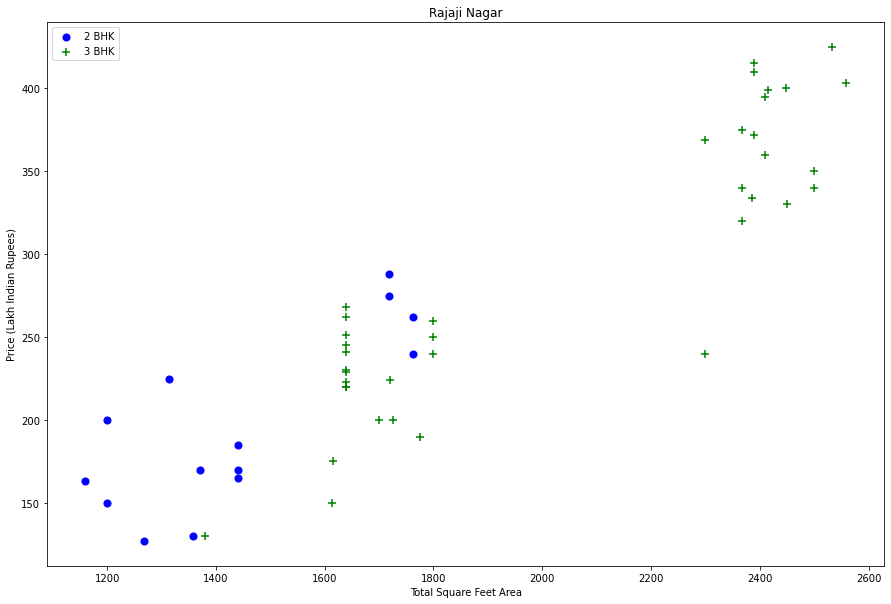

In [73]:
def plot_scatter_chart(df,location): # This function creates 2 different dataframes where for same location we have data points for two and three bedroom apartments 
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

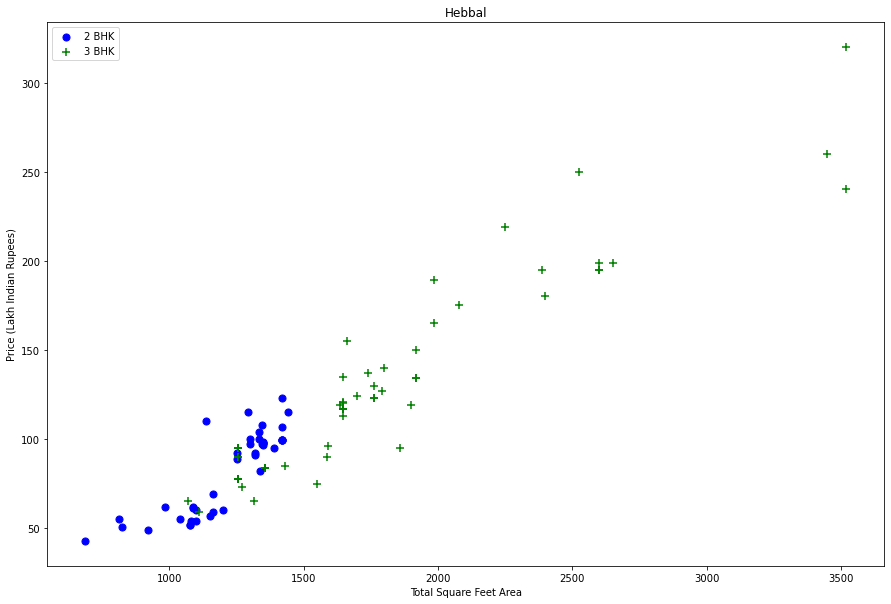

In [74]:
plot_scatter_chart(df7,"Hebbal")

#### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i. e

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [75]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):  # First doing location groupby going through every location of dataframe
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):  # For every location dataframe, we are creating new dataframe based on 'bhk'
            bhk_stats[bhk] = {                          # Per 'bhk' dataframe we are computing mean, std and count
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):   # Again running the same loop, trying to exclude data points whose value (price_per_sqft) is less than mean of the previous 'bhk'
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:              # Considering only those cases where number of apartments (for given bhk) is greater than 5. Because less than that would be very few samples to run any logic. 5 is a randomly taken number.
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

#### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

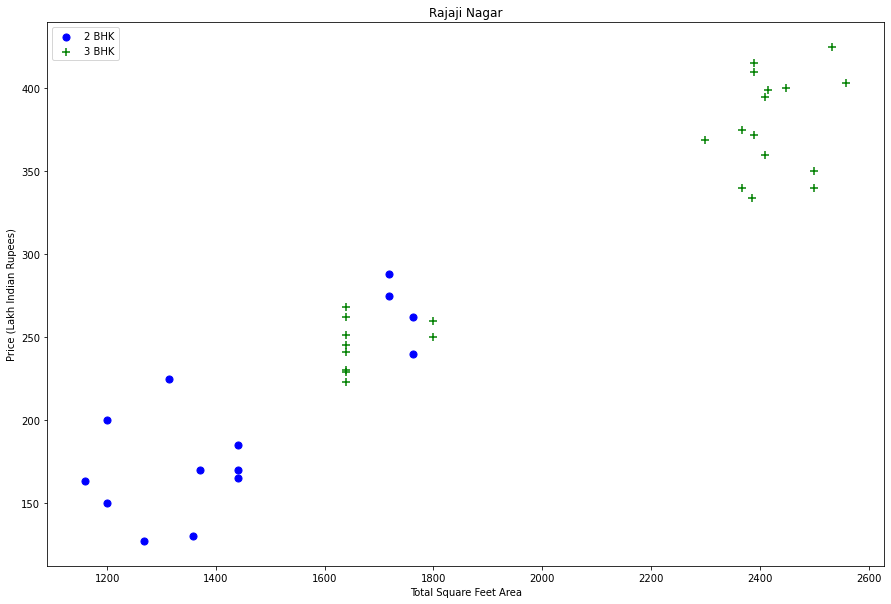

In [76]:
plot_scatter_chart(df8,"Rajaji Nagar")

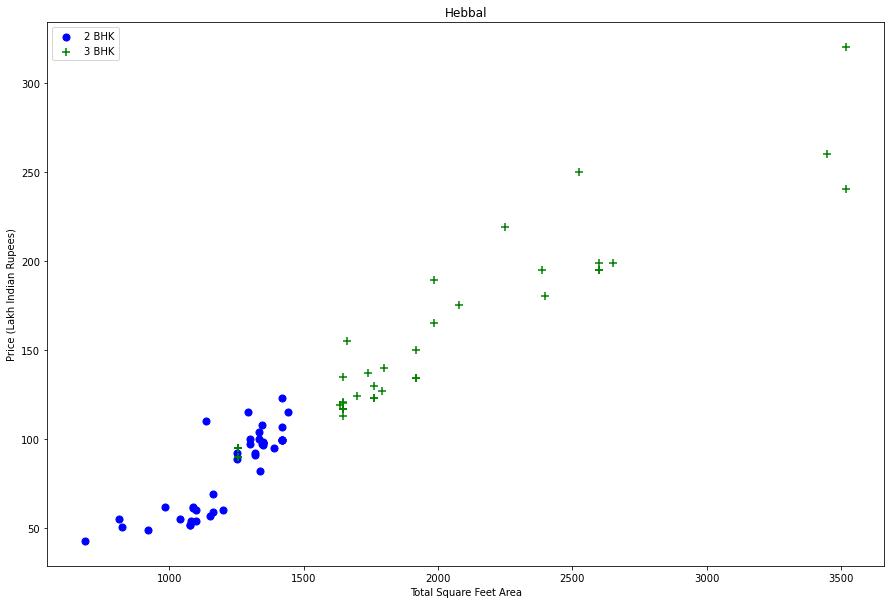

In [77]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

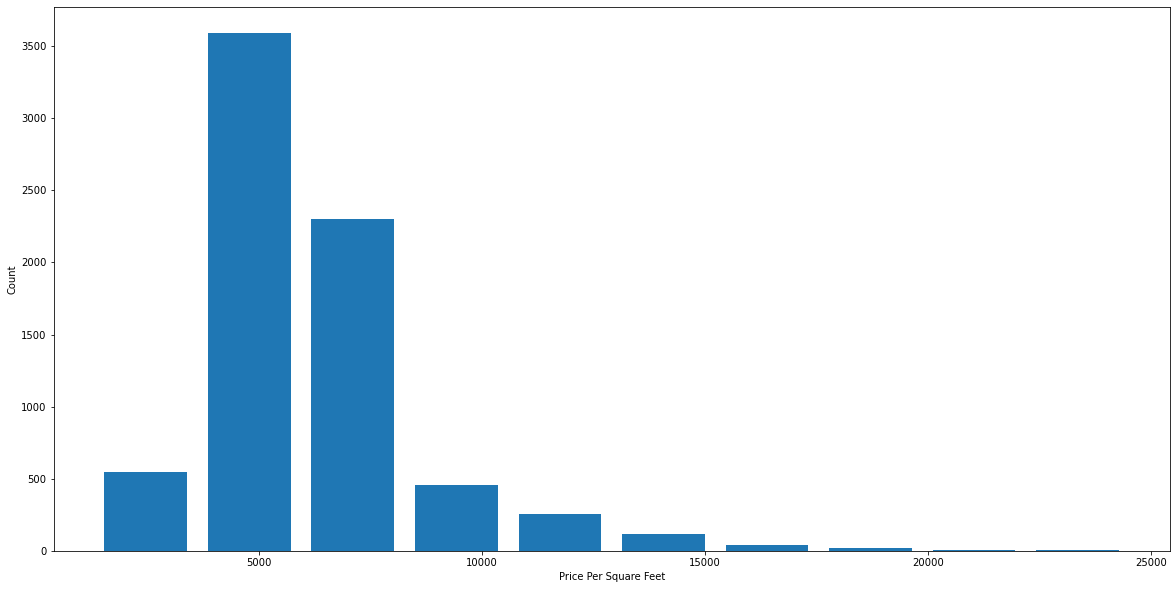

In [78]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<b> It shows my dataset has normal distribution (bell-curved)

### Outlier Removal Using Bathrooms Feature

In [79]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [80]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

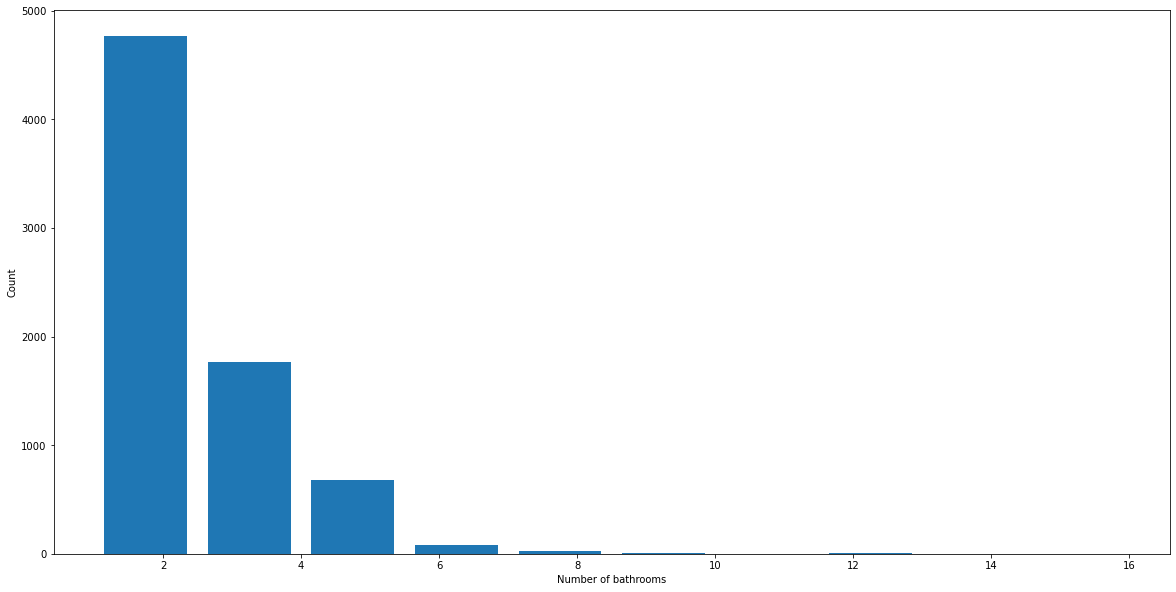

In [81]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [82]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### Threshold given by manager: It is unusual to have 2 more bathrooms than number of bedrooms in a home. 

In [83]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


#### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [84]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [85]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [86]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')  #Because for size we have 'bhk' feature, and price_per_sqft feature was just used to detect outliers
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [87]:
df10.shape

(7251, 5)

# One Hot Encoding

In [88]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b> To append dummies in our data frame

In [89]:
df11=pd.concat([df10,dummies],axis='columns')

<b> To avoid dummies trap, we should have one less column

In [90]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df12=df11.drop(['location'],axis='columns') # Now there is no need of location column
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df12.shape

(7251, 245)

# Model Building

In [93]:
X=df12.drop('price',axis='columns') #To drop the dependent column
X.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y=df12['price']   # OR df12.price. Creation of dependent variable dataframe
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## 1 - Training-Test-Splitting of Data

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)    #20% data is for evaluation of Model performance

## 2 - Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

## 3 - Model Building

### 1 - Linear Regression Model

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [99]:
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score=lr.score(X_test,y_test)
lr_score, lr_rmse

(0.8452277697873781, 27.986889672224788)

### 2 - Lasso Model

In [100]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso()
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) 
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8134919205225581, 30.722527416430825)

### 3 - Ridge Model

In [101]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge()
lr_ridge.fit(X_train, y_train)
lr_ridge_score=lr_ridge.score(X_test, y_test) 
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(X_test))
lr_ridge_score, lr_ridge_rmse

(0.84522546405886, 27.987098139626298)

### Comparison between Linear, Lasso and Ridge Regression Models

In [102]:
lr_score,lr_lasso_score,lr_ridge_score

(0.8452277697873781, 0.8134919205225581, 0.84522546405886)

In [103]:
lr_rmse,lr_lasso_rmse,lr_ridge_rmse

(27.986889672224788, 30.722527416430825, 27.987098139626298)

### 4 - Support Vector Regression Model

In [104]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) 
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.25370483637673225, 61.45587818902184)

### 5 - Random Forest Regression Model

In [105]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) 
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.7945195539474839, 32.24730055073572)

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [106]:
from sklearn.model_selection import KFold,cross_val_score
cvs = cross_val_score(lr, X_train,y_train, cv = 10)
cvs, cvs.mean()

(array([0.90718217, 0.85205896, 0.71322503, 0.8690185 , 0.77442204,
        0.86979675, 0.76375281, 0.82633516, 0.86697609, 0.85025024]),
 0.8293017767622175)

### Use of ShuffleSplit (to equally distribute the data for model building)

In [107]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X_train, y_train, cv=cv)

array([0.83138119, 0.83224308, 0.87421572, 0.8837065 , 0.8080133 ])

<b> We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

## ****Hyper Parameter Tuning****
### Find best model using GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pip

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687660,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.717063,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


<b>Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Test the model for few properties

In [109]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [110]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

67228.51814557283

In [111]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

67231.7360719785

In [112]:
predict_price('Indira Nagar',1000, 2, 2)

67235.07587882817

In [113]:
predict_price('Indira Nagar',1000, 3, 3)

67238.29380523384

## Export the tested model to a pickle file

In [114]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [115]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))